[Link](https://www.kaggle.com/hellbuoy/car-price-prediction)

| --- | --- | --- |
| Car_ID |			Unique id of each observation (Interger) |
| Symboling | 				Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) |
| carCompany |				Name of car company (Categorical) |
| fueltype |				Car fuel type i.e gas or diesel (Categorical) |
| aspiration |				Aspiration used in a car (Categorical) |
| doornumber |				Number of doors in a car (Categorical) |
| carbody |				body of car (Categorical) |
| drivewheel |				type of drive wheel (Categorical) |
| enginelocation |				Location of car engine (Categorical) |
| wheelbase |				Weelbase of car (Numeric) |
| carlength |				Length of car (Numeric) |
| carwidth |				Width of car (Numeric) |
| carheight |				height of car (Numeric) |
| curbweight |				The weight of a car without occupants or baggage. (Numeric) |
| enginetype |				Type of engine. (Categorical) |
| cylindernumber |				cylinder placed in the car (Categorical) |
| enginesize |				Size of car (Numeric) |
| fuelsystem |				Fuel system of car (Categorical) |
| boreratio |				Boreratio of car (Numeric) |
| stroke |				Stroke or volume inside the engine (Numeric) |
| compressionratio |				compression ratio of car (Numeric) |
| horsepower |				Horsepower (Numeric) |
| peakrpm |				car peak rpm (Numeric) |
| citympg |				Mileage in city (Numeric) |
| highwaympg |				Mileage on highway (Numeric) |
| price(Dependent variable) |				Price of car (Numeric) |


In [196]:
import importlib

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
from scipy import stats
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import AdaBoostRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, PoissonRegressor, SGDRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
import shap

import ml_pipe

importlib.reload(ml_pipe)

# версии библиотек
print("Версии библиотек:")
import pkg_resources
import platform

print(f"python=={platform.python_version()}")

# list packages to be checked
root_packages = [
    'pandas', 'numpy', 'matplotlib', 'plotly', 'scikit-learn'
]
# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

Версии библиотек:
python==3.9.7
plotly==5.5.0
matplotlib==3.5.1
numpy==1.20.3
pandas==1.3.4
scikit-learn==1.0.2


In [197]:
# pandas
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.mode.chained_assignment = None

# plotly
pio.templates.default = "plotly_dark"  # plotly_dark seaborn
pio.renderers.default = "svg"  # svg notebook_connected plotly_mimetype

# sklearn
rng = np.random.RandomState(0)

In [198]:
df = pd.read_csv('datasets/car_price_prediction/CarPrice_Assignment.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [199]:
df = ml_pipe.pythonic_names(df)

display(df.columns)

Index(['car_id', 'symboling', 'car_name', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# EDA

In [200]:
def price_by_column(df: pd.DataFrame, column: str, all_count_thresh=0):
    return (
        df
            .groupby(column).agg({'price': 'mean', 'car_id': 'count'})
            .rename(columns={'price': 'price_mean', 'car_id': 'count'})
            # .assign(percent=lambda x: x['is_canceled_count'] / x['all_count'])
            # .query(f'all_count >= {all_count_thresh}')
    )

### symboling

,price_mean,count
symboling,,
-2,15781.666667,3
-1,17330.681818,22
0,14366.965179,67
1,10037.907407,54
2,10109.281250,32
3,17221.296296,27


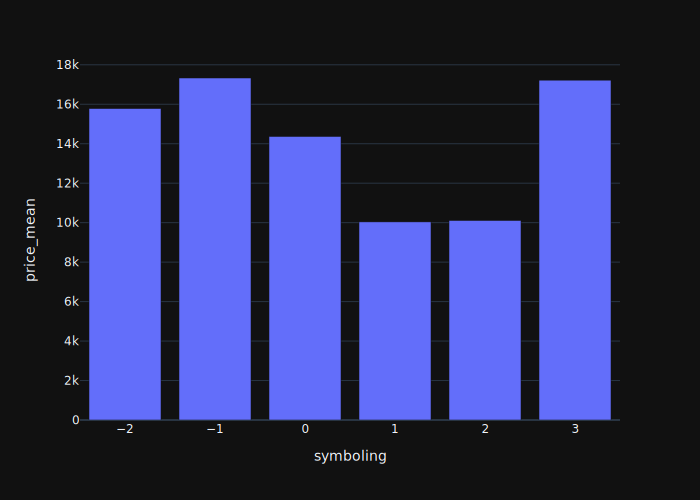

In [201]:
price_by_symboling = price_by_column(df, 'symboling')

display(price_by_symboling)

px.bar(price_by_symboling, y='price_mean')

## car_name

In [202]:
price_by_car_name = price_by_column(df, 'car_name')

display(price_by_symboling)

,price_mean,count
symboling,,
-2,15781.666667,3
-1,17330.681818,22
0,14366.965179,67
1,10037.907407,54
2,10109.281250,32
3,17221.296296,27


## fueltype

,price_mean,count
fueltype,,
diesel,15838.1500,20
gas,12999.7982,185


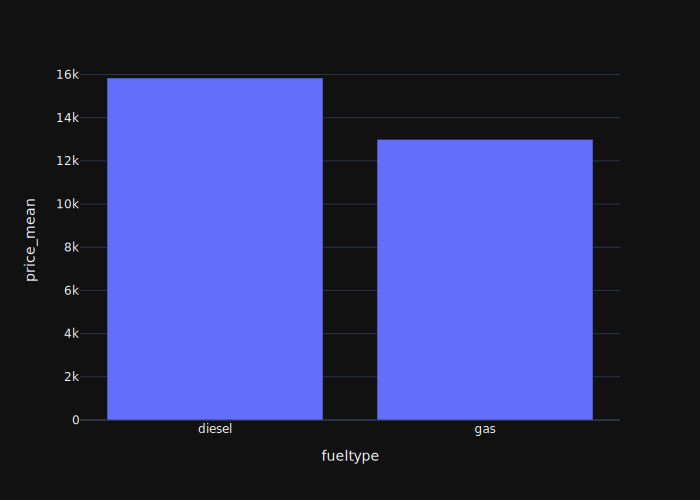

In [203]:
price_by_fueltype = price_by_column(df, 'fueltype')

display(price_by_fueltype)

px.bar(price_by_fueltype, y='price_mean')

## aspiration

,price_mean,count
aspiration,,
std,12611.270833,168
turbo,16298.166676,37


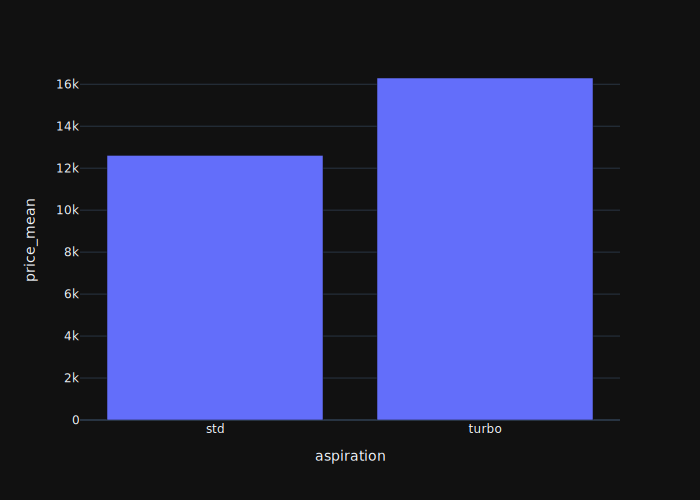

In [204]:
price_by_aspiration = price_by_column(df, 'aspiration')

display(price_by_aspiration)

px.bar(price_by_aspiration, y='price_mean')

## doornumber

,price_mean,count
doornumber,,
four,13501.152174,115
two,12989.924078,90


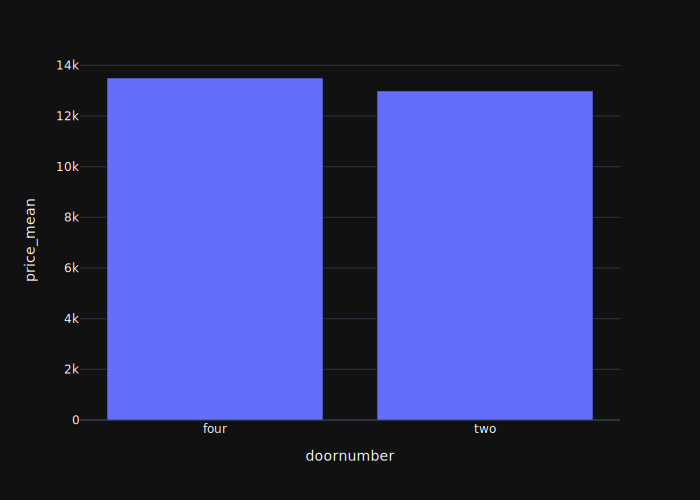

In [205]:
price_by_doornumber = price_by_column(df, 'doornumber')

display(price_by_doornumber)

px.bar(price_by_doornumber, y='price_mean')

## carbody

,price_mean,count
carbody,,
convertible,21890.500000,6
hardtop,22208.500000,8
hatchback,10376.652386,70
sedan,14344.270833,96
wagon,12371.960000,25


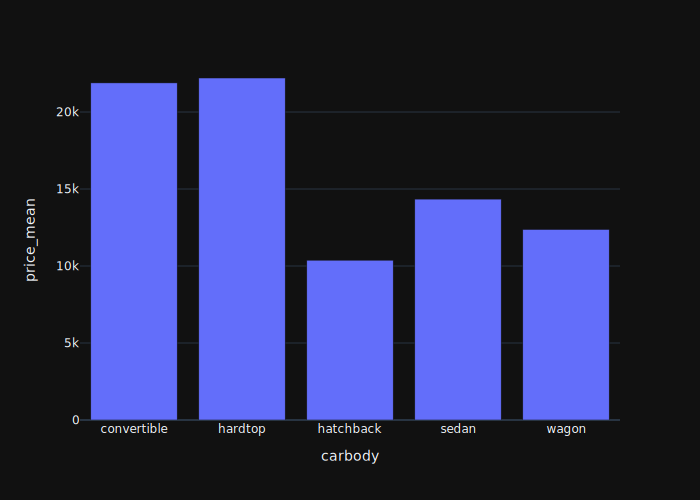

In [206]:
price_by_carbody = price_by_column(df, 'carbody')

display(price_by_carbody)

px.bar(price_by_carbody, y='price_mean')

## drivewheel

,price_mean,count
drivewheel,,
4wd,11087.463000,9
fwd,9239.308333,120
rwd,19910.809211,76


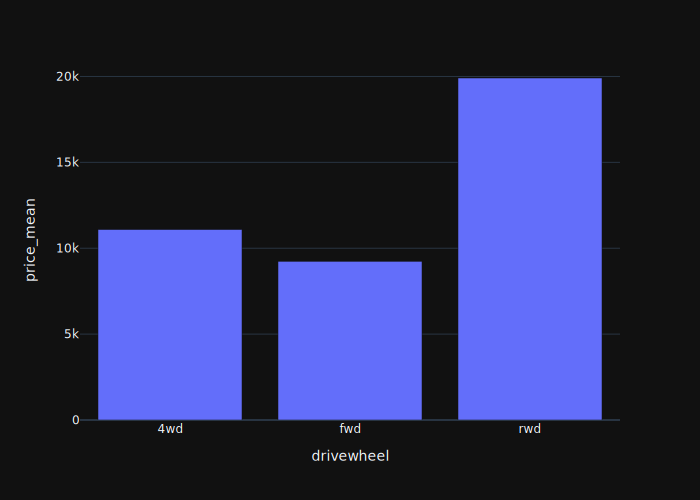

In [207]:
price_by_drivewheel = price_by_column(df, 'drivewheel')

display(price_by_drivewheel)

px.bar(price_by_drivewheel, y='price_mean')

## enginelocation

,price_mean,count
enginelocation,,
front,12961.097361,202
rear,34528.000000,3


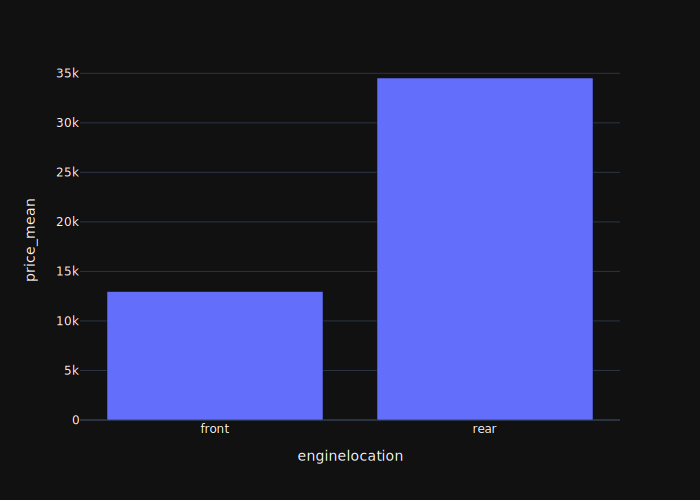

In [208]:
price_by_enginelocation = price_by_column(df, 'enginelocation')

display(price_by_enginelocation)

px.bar(price_by_enginelocation, y='price_mean')

## wheelbase

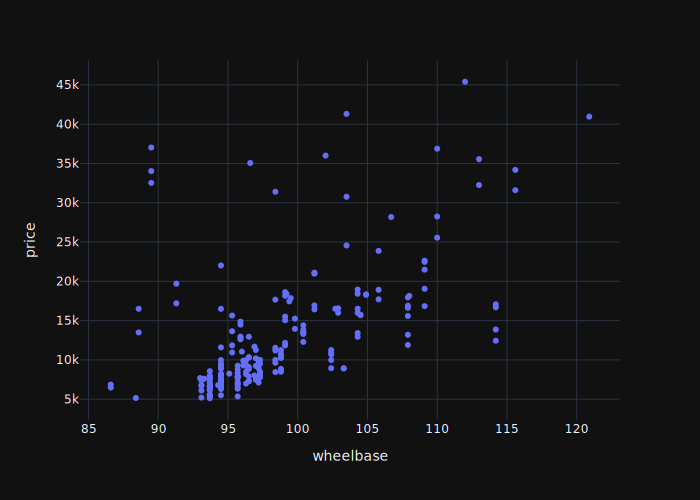

In [209]:
px.scatter(df, x='wheelbase', y='price')

## carlength

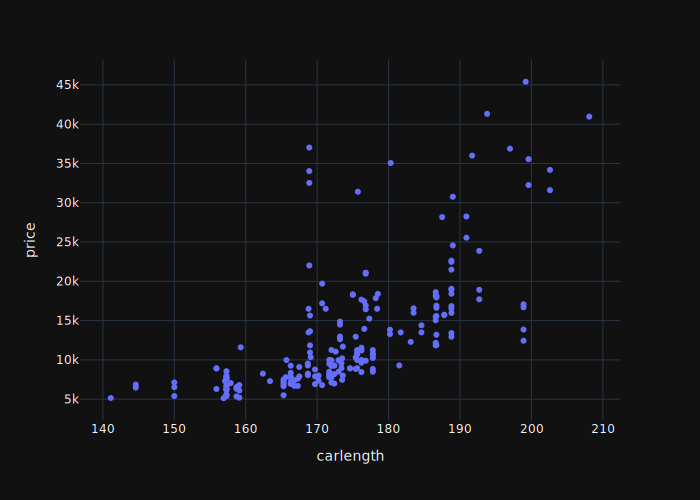

In [210]:
px.scatter(df, x='carlength', y='price')

## carwidth

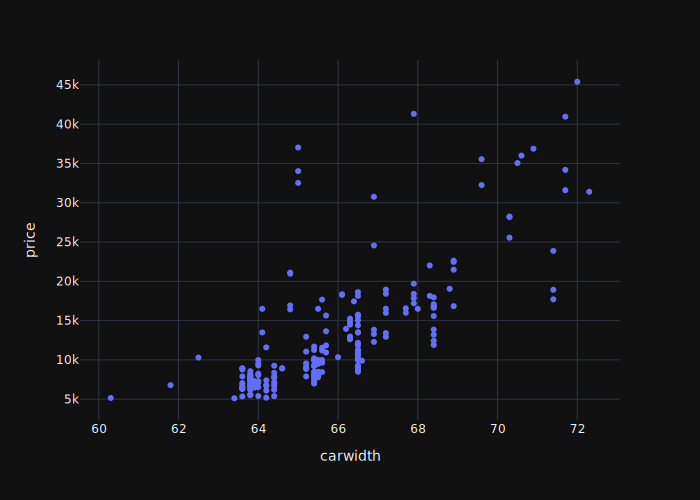

In [211]:
px.scatter(df, x='carwidth', y='price')

## carheight

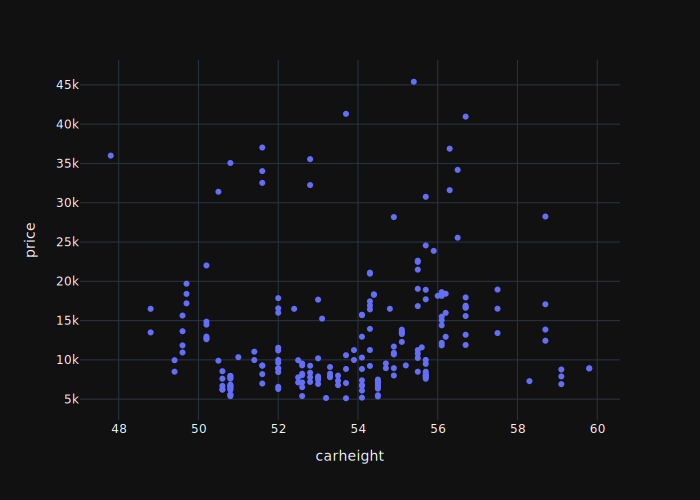

In [212]:
px.scatter(df, x='carheight', y='price')

## curbweight

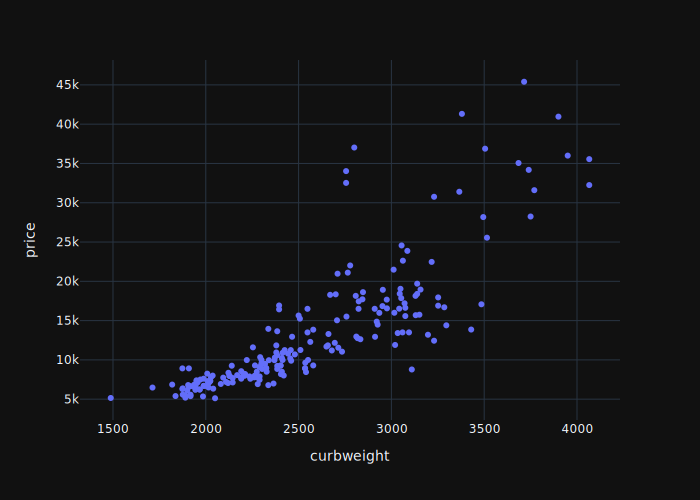

In [213]:
px.scatter(df, x='curbweight', y='price')

## enginetype

,price_mean,count
enginetype,,
dohc,18116.416667,12
dohcv,31400.500000,1
l,14627.583333,12
ohc,11574.048426,148
ohcf,13738.600000,15
ohcv,25098.384615,13
rotor,13020.000000,4


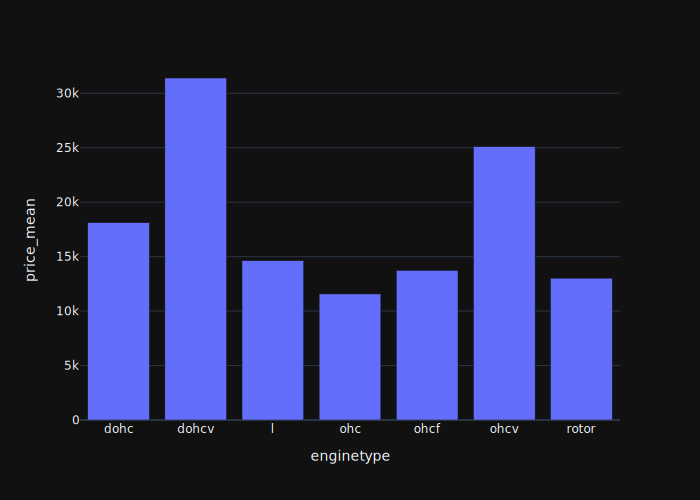

In [214]:
price_by_enginetype = price_by_column(df, 'enginetype')

display(price_by_enginetype)

px.bar(price_by_enginetype, y='price_mean')

## cylindernumber

,price_mean,count
cylindernumber,,
eight,37400.100000,5
five,21630.469727,11
four,10285.754717,159
six,23671.833333,24
three,5151.000000,1
twelve,36000.000000,1
two,13020.000000,4


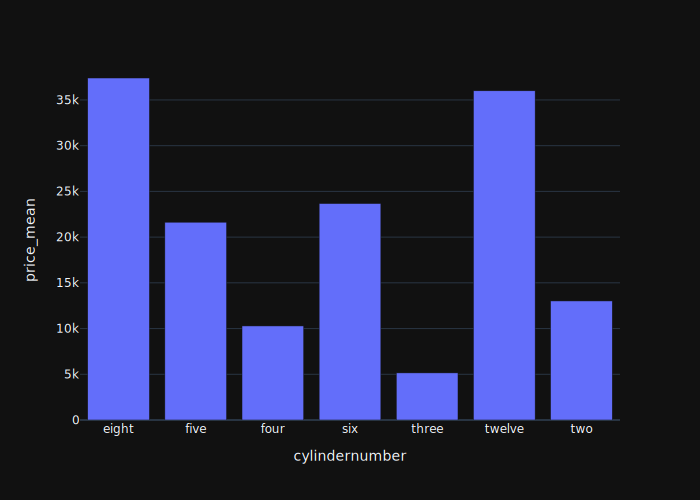

In [215]:
price_by_cylindernumber = price_by_column(df, 'cylindernumber')

display(price_by_cylindernumber)

px.bar(price_by_cylindernumber, y='price_mean')

## enginesize

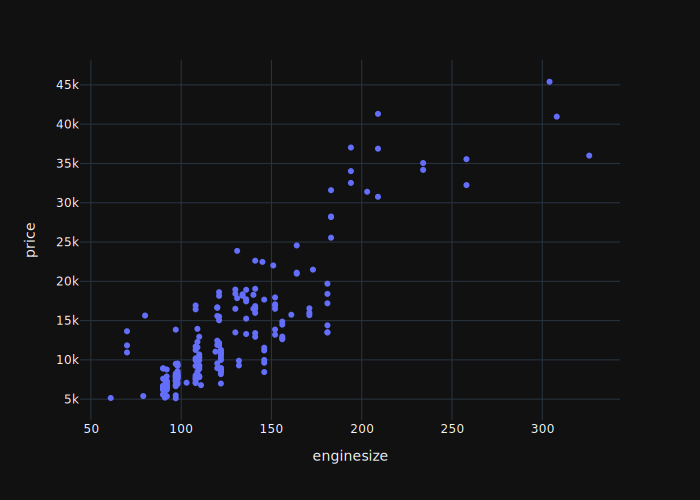

In [216]:
px.scatter(df, x='enginesize', y='price')

## fuelsystem

,price_mean,count
fuelsystem,,
1bbl,7555.545455,11
2bbl,7478.151515,66
4bbl,12145.000000,3
idi,15838.150000,20
mfi,12964.000000,1
mpfi,17754.602840,94
spdi,10990.444444,9
spfi,11048.000000,1


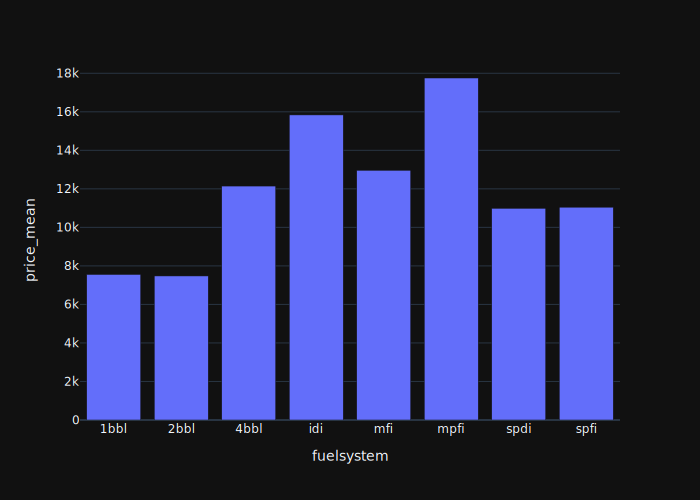

In [217]:
price_by_fuelsystem = price_by_column(df, 'fuelsystem')

display(price_by_fuelsystem)

px.bar(price_by_fuelsystem, y='price_mean')

## boreratio

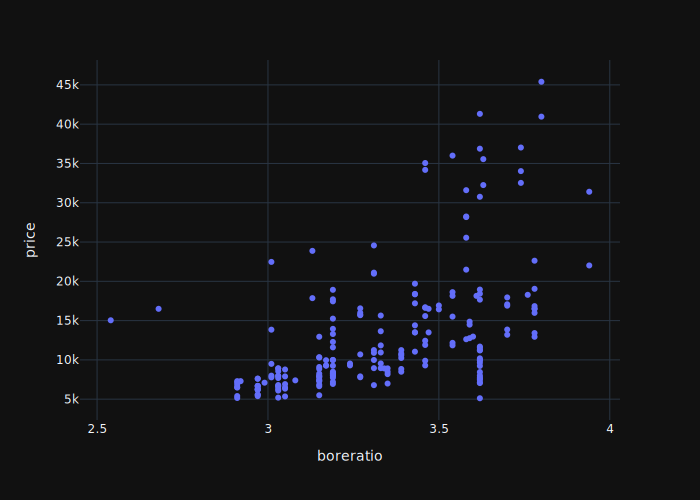

In [218]:
px.scatter(df, x='boreratio', y='price')

## stroke

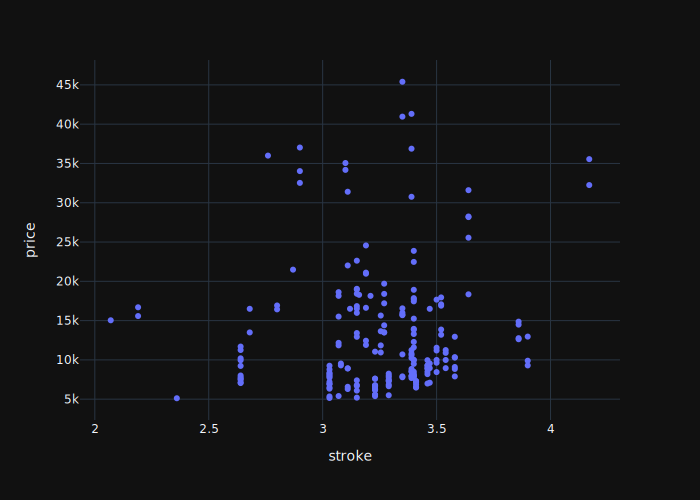

In [219]:
px.scatter(df, x='stroke', y='price')

## compressionratio

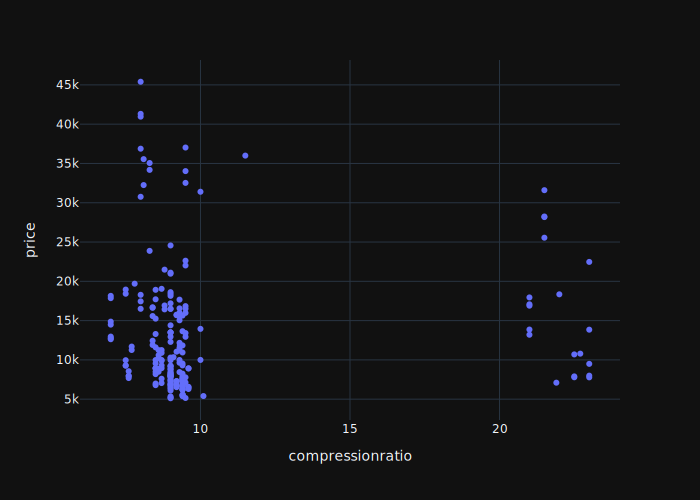

In [220]:
px.scatter(df, x='compressionratio', y='price')

## horsepower

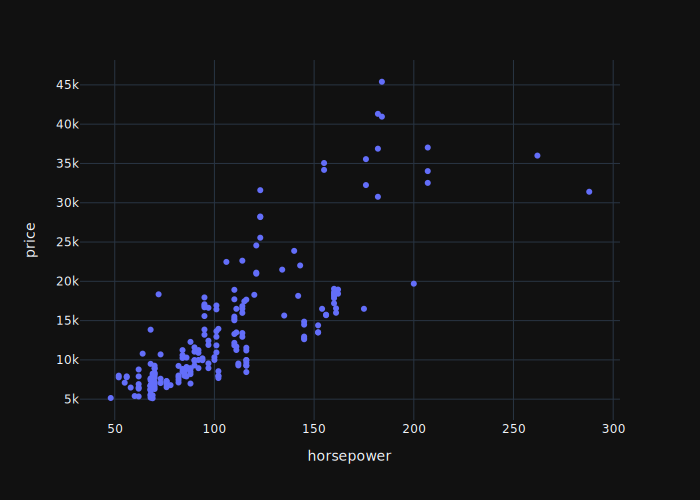

In [221]:
px.scatter(df, x='horsepower', y='price')

## peakrpm

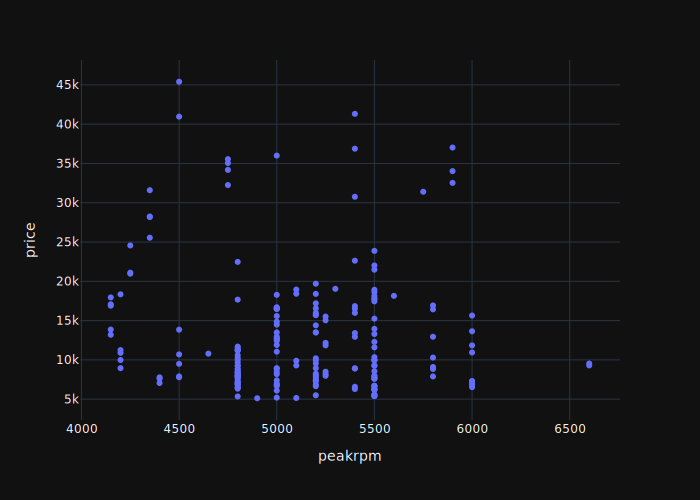

In [222]:
px.scatter(df, x='peakrpm', y='price')

## citympg

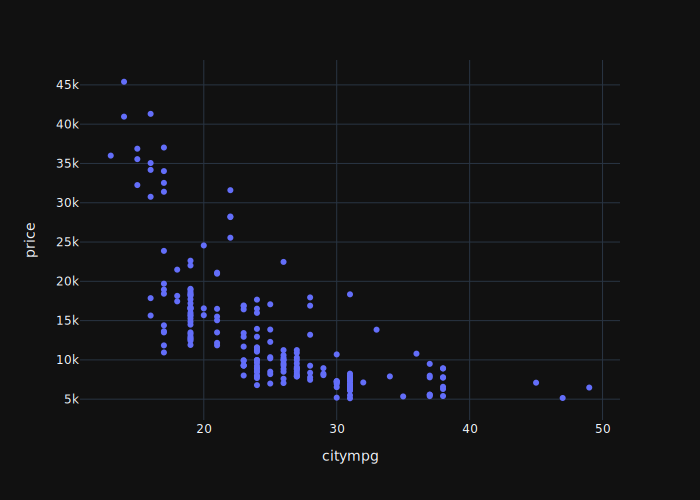

In [223]:
px.scatter(df, x='citympg', y='price')

## highwaympg

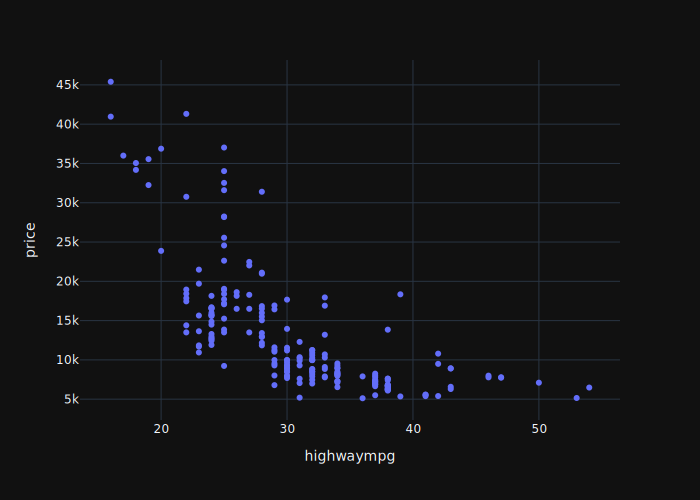

In [224]:
px.scatter(df, x='highwaympg', y='price')

# Select features

In [225]:
train, test = train_test_split(df, test_size=0.3, random_state=rng)

In [226]:
features = ['fueltype', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', ]
features_scale = ['horsepower', 'peakrpm', 'citympg', 'highwaympg', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', ]
features_encode = ['fueltype', 'carbody', 'drivewheel', 'cylindernumber', ]

target = ['price']

x_train = train[features]
x_test = test[features]
y_train = train[target]
y_test = test[target]

In [227]:
model_stat = pd.DataFrame()

pipe_preprocess = Pipeline(
    [
        ('encode', ml_pipe.OneHotEncoderMy(features_encode)),
        ('scale', ml_pipe.StandardScalerMy(features_scale)),
    ]
)

# Model selection

## dummy

### DummyRegressor

In [228]:
pipe = Pipeline(
    [
        ('pre', pipe_preprocess),
        ('model', DummyRegressor()),
    ]
)

search_params = {
    'model__strategy': ['mean', 'median'],
}

search = GridSearchCV(pipe, param_grid=search_params, verbose=20, scoring='r2', cv=3, n_jobs=-1)
search.fit(x_train, np.ravel(y_train))
print(search.best_score_)
print(search.best_params_)

final_dummy = Pipeline(
    [
        ('pre', pipe_preprocess),
        ('model', DummyRegressor(
            strategy=search.best_params_['model__strategy'],
        )),
    ]
)
final_dummy.fit(x_train, np.ravel(y_train))

y_train_pred = final_dummy.predict(x_train)
y_test_pred = final_dummy.predict(x_test)

model_stat = ml_pipe.regression_report(model_stat, 'DummyRegressor', y_train, y_train_pred, y_test, y_test_pred)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
-0.05102448329271884
{'model__strategy': 'mean'}


R2                    MAE                      RMSE  \
               train      test        train         test        train   
DummyRegressor   0.0 -0.000087  5895.228441  5925.844707  7900.196043   

                                 MAPE            
                       test     train      test  
DummyRegressor  8126.692945  0.505425  0.526108

## LinearRegression

In [229]:
pipe = Pipeline(
    [
        ('pre', pipe_preprocess),
        ('model', LinearRegression(
            n_jobs=-1,
        )),
    ]
)

pipe.fit(x_train, np.ravel(y_train))

y_train_pred = pipe.predict(x_train)
y_test_pred = pipe.predict(x_test)

model_stat = ml_pipe.regression_report(model_stat, 'LinearRegression', y_train, y_train_pred, y_test, y_test_pred)

R2                    MAE                      RMSE  \
                     train      test        train         test        train   
DummyRegressor    0.000000 -0.000087  5895.228441  5925.844707  7900.196043   
LinearRegression  0.899035  0.862100  1811.979167  2146.846666  2510.290288   

                                   MAPE            
                         test     train      test  
DummyRegressor    8126.692945  0.505425  0.526108  
LinearRegression  3017.706902  0.140275  0.167634

In [230]:
pipe = Pipeline(
    [
        ('pre', pipe_preprocess),
        ('model', RandomForestRegressor(
            n_jobs=-1,
            random_state=rng,
        )),
    ]
)

search_params = {
    'model__max_depth': range(8, 25),
    'model__max_features': ['auto'],  # range(2, len(features) + 1),
    'model__n_estimators': range(100, 500),
    'model__max_leaf_nodes': range(3000, 10001, 1000),
    'model__min_samples_split': range(2, 50),
    'model__min_samples_leaf': range(1, 20),
}

search = RandomizedSearchCV(
    pipe,
    param_distributions=search_params,
    verbose=1,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    random_state=rng,
    n_iter=10,
)
search.fit(x_train, np.ravel(y_train))
print(search.best_score_)
print(search.best_params_)

final_rfc = Pipeline(
    [
        ('pre', pipe_preprocess),
        ('model', RandomForestRegressor(
            max_depth=search.best_params_['model__max_depth'],
            max_features=search.best_params_['model__max_features'],
            n_estimators=search.best_params_['model__n_estimators'],
            n_jobs=-1,
            random_state=rng,
            max_leaf_nodes=search.best_params_['model__max_leaf_nodes'],
            min_samples_split=search.best_params_['model__min_samples_split'],
            min_samples_leaf=search.best_params_['model__min_samples_leaf'],
        )),
    ]
)
final_rfc.fit(x_train, np.ravel(y_train))

y_train_pred = final_rfc.predict(x_train)
y_test_pred = final_rfc.predict(x_test)

model_stat = ml_pipe.regression_report(model_stat, 'RandomForestRegressor', y_train, y_train_pred, y_test, y_test_pred)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0.8468843903601059
{'model__n_estimators': 106, 'model__min_samples_split': 23, 'model__min_samples_leaf': 6, 'model__max_leaf_nodes': 10000, 'model__max_features': 'auto', 'model__max_depth': 9}


R2                    MAE               \
                          train      test        train         test   
DummyRegressor         0.000000 -0.000087  5895.228441  5925.844707   
LinearRegression       0.899035  0.862100  1811.979167  2146.846666   
RandomForestRegressor  0.925551  0.881238  1504.598976  1724.646686   

                              RMSE                   MAPE            
                             train         test     train      test  
DummyRegressor         7900.196043  8126.692945  0.505425  0.526108  
LinearRegression       2510.290288  3017.706902  0.140275  0.167634  
RandomForestRegressor  2155.588804  2800.485418  0.108988  0.122301

In [234]:
pipe = Pipeline(
    [
        ('pre', pipe_preprocess),
        ('model', HistGradientBoostingRegressor(
            random_state=rng,
        )),
    ]
)

search_params = {
    'model__max_iter': range(5000, 10001, 500),
    'model__learning_rate': stats.uniform(0.001, 0.2),
    'model__max_depth': range(5, 51, 5),
    'model__l2_regularization': stats.uniform(0, 2.0),
    'model__max_bins': [255],
}

search = RandomizedSearchCV(
    pipe,
    param_distributions=search_params,
    verbose=1,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    random_state=rng,
    n_iter=50,
)
search.fit(x_train, np.ravel(y_train))
print(search.best_score_)
print(search.best_params_)

final_hgbr = Pipeline(
    [
        ('pre', pipe_preprocess),
        ('model', HistGradientBoostingRegressor(
            max_iter=search.best_params_['model__max_iter'],
            learning_rate=search.best_params_['model__learning_rate'],
            max_depth=search.best_params_['model__max_depth'],
            l2_regularization=search.best_params_['model__l2_regularization'],
            random_state=rng,
            max_bins=search.best_params_['model__max_bins'],
        )),
    ]
)
final_hgbr.fit(x_train, np.ravel(y_train))

y_train_pred = final_hgbr.predict(x_train)
y_test_pred = final_hgbr.predict(x_test)

model_stat = ml_pipe.regression_report(
    model_stat, 'HistGradientBoostingRegressor', y_train, y_train_pred, y_test, y_test_pred
)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
-1982.6183988847683
{'model__l2_regularization': 0.017862530011802713, 'model__learning_rate': 0.019046595897938157, 'model__max_bins': 255, 'model__max_depth': 30, 'model__max_iter': 7500}


R2                    MAE               \
                                  train      test        train         test   
DummyRegressor                 0.000000 -0.000087  5895.228441  5925.844707   
LinearRegression               0.899035  0.862100  1811.979167  2146.846666   
RandomForestRegressor          0.925551  0.881238  1504.598976  1724.646686   
HistGradientBoostingRegressor  0.993959  0.895585   295.141001  1771.783510   

                                      RMSE                   MAPE            
                                     train         test     train      test  
DummyRegressor                 7900.196043  8126.692945  0.505425  0.526108  
LinearRegression               2510.290288  3017.706902  0.140275  0.167634  
RandomForestRegressor          2155.588804  2800.485418  0.108988  0.122301  
HistGradientBoostingRegressor   614.034339  2625.889255  0.020968  0.130548

# Interpretation

Permutation explainer: 144it [00:31,  3.31it/s]                         


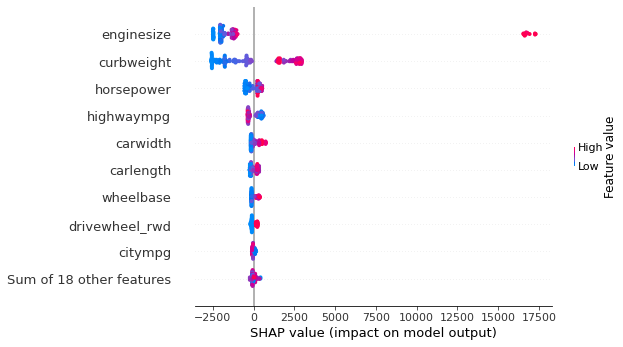

In [235]:
pipe_for_shap = pipe_preprocess

pipe_for_shap.fit(x_train)

x = pipe_for_shap.transform(x_train)

explainer = shap.Explainer(final_rfc[-1].predict, x)
shap_values = explainer(pipe_for_shap.transform(x_train))

shap.plots.beeswarm(shap_values)

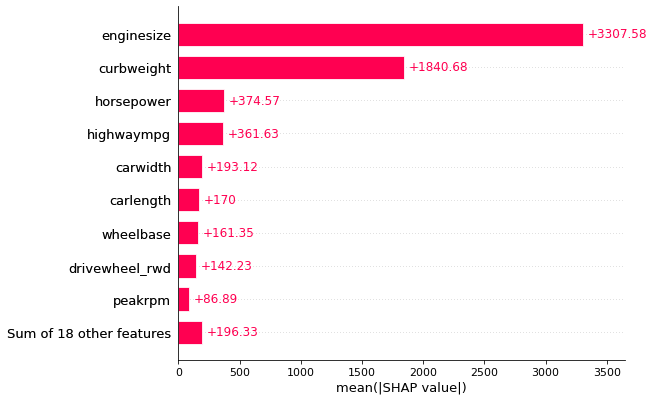

In [236]:
shap.plots.bar(shap_values)

,114
fueltype,diesel
carbody,wagon
drivewheel,rwd
wheelbase,114.2
carlength,198.9
carwidth,68.4
curbweight,3485
cylindernumber,four
enginesize,152
boreratio,3.7


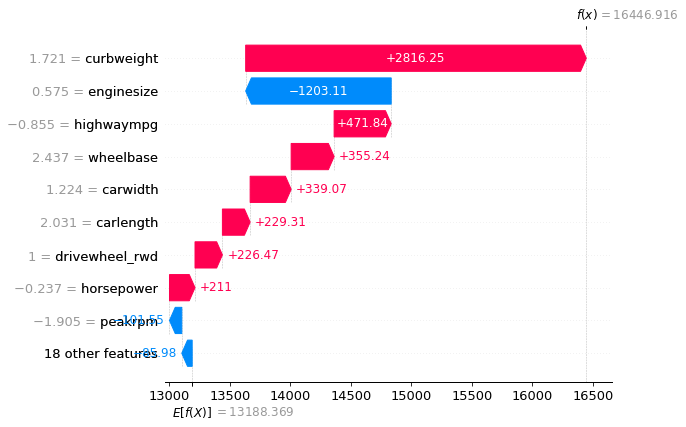

In [250]:
idx = 100

display(x_train.iloc[idx].to_frame())

shap.plots.waterfall(shap_values[idx])